 ***
<a id='lesson-4'></a>
# Lesson-4: Molecular Dynamics
***
- Molecular Dynamics is essentially the application of the Newtons Second Law to molecules, where the force acting on each part of the molecule is computed by modelling its interaction with every other part of the system.
- Total potential energy of the system: 
$$ U = \sum_{i\in\{bonds\}} \frac{1}{2} k_{b,i} (d_i - d_{0,i})^2 + \sum_{i\in\{angles\}} \frac{1}{2} k_{a,i} (\theta_i - \theta_{0,i})^2 + \\ \sum_{i\in\{dihedrals\}} \phi ( cos(n\theta_i)-1)  +  \sum_{i,j\in\{non-bond~pairs\}} \left( U_{LJ}(i,j) +  U_{Columbic}(i,j)\right)
$$
- Equations of motion given by:
$$ \frac{d\vec{p}_i}{dt} = \vec{F}_i \\ \frac{d \vec{r}_i}{dt} = \vec{p}_i/m_i $$
- Euler Method:
$$ \vec{p}_i(t+dt) = \vec{p}_i(t) + dt~\vec{F}_i(t) \\ \vec{r}_i(t+dt)=\vec{r}_i(t) + dt\vec{p}_i/m_i
$$
where the atom index $i \in [1,N]$
- Check on accuracy: constant total energy, total linear momentum
- Example: Simple harmonic oscillator



## Example: Argon
Argon atom is electrically neutral and a good model for the pair-wise interaction between two Argon atoms is given by Lennard-Jones potential, whose functional form is given by:
$$ U_{LJ} (\vec{r}_i,\vec{r}_j) = 4 \epsilon \left( \left(\frac{\sigma}{r} \right)^{12}- \left(\frac{\sigma}{r} \right)^6 \right)  $$
where $\vec{r} = \vec{r}_i - \vec{r}_j$ and $r=|\vec{r}|$. The force on particle $i$ due to its interaction via LJ potenital with particle $j$ is then given by: $$-\left( \frac{\partial U_{LJ}}{\partial x_i}, \frac{\partial U_{LJ}}{\partial y_i},\frac{\partial U_{LJ}}{\partial z_i} \right)$$
And the total potential of the system of $N$ Argon atoms is sum of all the pairwise interactions, i.e.,
$$ U = \frac{1}{2} \sum_{i,j=1, i\ne j}^N U_{LJ} (\vec{r}_i,\vec{r}_j) = \sum_{i<j} U_{LJ} (\vec{r}_i,\vec{r}_j)$$
Using the Euler method mentioned above, write a program to compute the trajectory of the system! 

Following functions might need to be written:

- `initialise_config`
- `initialise_momenta`
- `compute_force`, `compute_pairwiseLJ(i, j, sigma, epsilon)`
- `compute_totalEnergy`, `compute_energy_pairwiseLJ(i, j, sigma, epsilon)`
- `euler_integrate(timestep)`



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
num = 64
dim = 2
temp = 273
mass = 40 * 1.6E-27
e = sig = 1
dt = 1E-19
pos,mom,force = [],[],[]

In [ ]:
def initialise_pos(num,dim):
    global pos
    pos = np.random.uniform(0,2,(num,dim))

In [ ]:
def initialise_mom(num,dim):
    global mom
    sig = (1.38E-23 * 273) ** (1/2)
    mom = np.random.normal(0,sig,(num,dim))

In [ ]:
def initialise_force(num,dim):
    global force
    force = np.zeros((num,dim))

In [ ]:
initialise_pos(num,dim)
initialise_mom(num,dim)
initialise_force(num,dim)

In [ ]:
def initial_force(pos):
    global force
    for idx,vec in enumerate(pos):
        r = np.linalg.norm(pos-vec, axis = 1)
        r = np.delete(r,idx,axis = 0)
        F = 24*e*sig*(2*(sig/r)**11 - (sig/r)**5) / (r**3)
        rtemp = np.delete(vec-pos, idx, axis = 0)
        F = rtemp * F [:,None]
        force[idx] = np.sum(F, axis = 0)

In [ ]:
initial_force(pos)

In [ ]:
def potential_energy(pos):
    sum = 0
    for idx,vec in enumerate(pos):
        r = np.linalg.norm(pos-vec, axis = 1)
        r = np.delete(r,idx,axis = 0)
        sum += np.sum(4*e*((sig/r)**12 - (sig/r)**6))
    sum /= 2
    return sum

def kinetic_energy(mom):
    total = 0
    p_square = (np.linalg.norm(mom, axis = 1)) ** 2
    total += np.sum(p_square) / 2 / mass
    return total

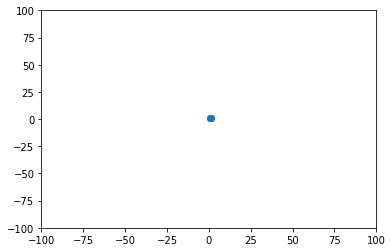

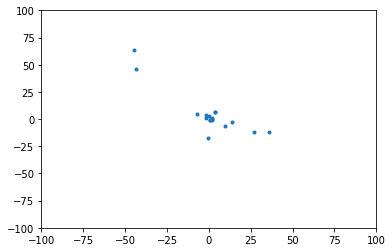

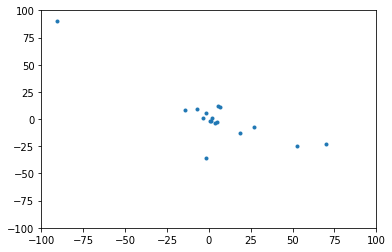

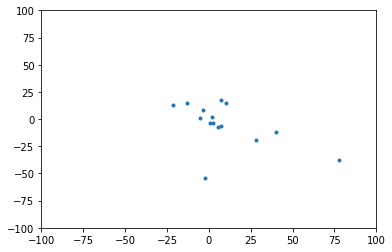

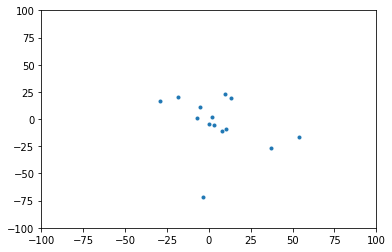

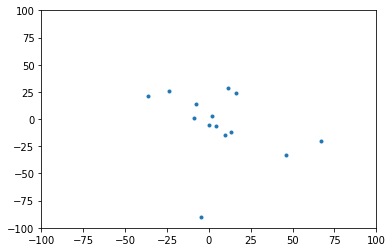

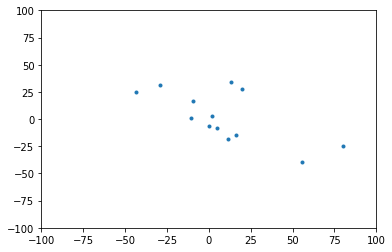

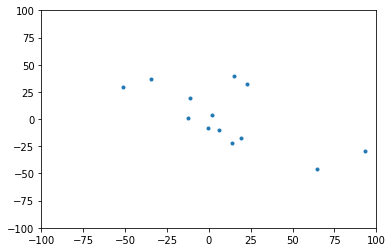

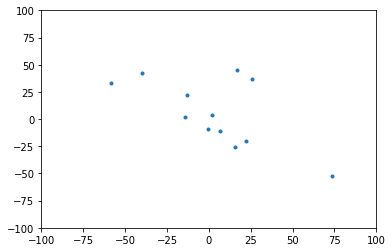

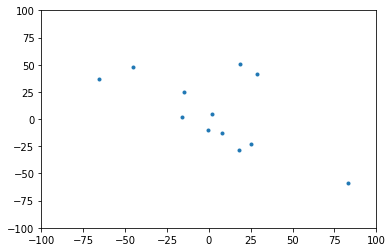

In [ ]:
KE, PE, TE = [], [], []

for i in range(1000):
    pos += mom / mass * dt
    mom += force * dt
    initial_force(pos)

    KE.append(kinetic_energy(mom))
    PE.append(potential_energy(pos))
    TE.append(KE[-1] + PE[-1])

    if (i % 100 == 0):
        plt.plot(pos[:,0], pos[:,1], '.')
        plt.ylim(-100,100)
        plt.xlim(-100,100)
        plt.show()

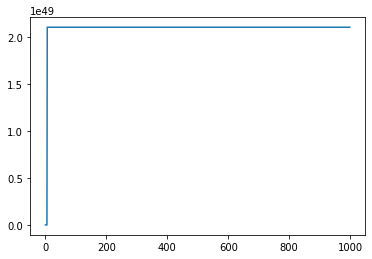

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


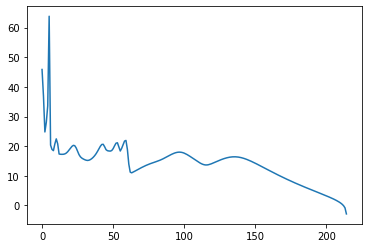

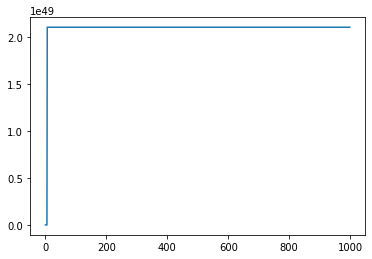

In [ ]:
plt.plot(KE)
plt.show()

plt.plot(np.log(PE))
plt.show()

plt.plot(TE)
plt.show()